# Colab에 Kaggle 설치

https://whoishoo.tistory.com/218

https://kubig-2021-2.tistory.com/35

In [ ]:
# Kaggle 설치 코드
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ahyeonryang","key":"dc8626e3bf3e2c3a545367158540893a"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d jessemostipak/hotel-booking-demand

hotel-booking-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 hotel-booking-demand.zip  'kaggle (1).json'   sample_data
 hotel_bookings.csv	    kaggle.json


## Kaggle datasets 사용하는 방법
코랩(Colab)에서 캐글(Kaggle) 설치까지 끝냈다면 데이터셋 링크를 복사하여 입력해주면 된다.

원하는 프로젝트의 [Data]에 들어가면 데이터셋을 다운 받을 수 있는 링크가 있다. 해당 링크를 복사하여 코드에 작성해주면 데이터셋 다운이 시작된다.

앞서서 캐글 설치를 끝냈기 때문에 캐글 안에서 특정 데이터셋을 다운로드할 수 있도록 세팅이 되어 있다.

문제는 압축파일, zip 형태로 데이터셋이 다운되다보니, 데이터셋을 ML에 사용하기 위해서는 unzip 과정을 거쳐야 한다.

한마디로 로컬 환경에서 압축파일을 풀어주듯이 코랩 환경에서 내 코랩 서버 안에 존재하는 압축된 데이터셋을 풀어줘야 한다는 것이다.

출처: https://whoishoo.tistory.com/218 [HOOAI:티스토리]

In [ ]:
!unzip hotel-booking-demand.zip

Archive:  hotel-booking-demand.zip
replace hotel_bookings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Kaggle 필사 001. Hotel-Booking-Demand
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

### My Comments

Mark description:  
　　🌿learned - 필사하면서 알게된 것  
　　❔❓Question - 필사하면서 이해가 안되거나 모르겠는 부분  
　　❗Consideration - Question에 대해 스스로 고찰해봄  
<br>
Code selection:  
**EDA of bookings and ML to predict cancelations (by MARCUS WINGEN)**  

➡️ 선정 이유: TOP CONTRIBUTORS이고 Notebook이 깔끔해서 따라하고 싶었다.

https://www.kaggle.com/code/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations/notebook


# **Hotel booking**

## **Content:**


**1 . EDA**

The dataset contains data from two different hotels. One Resort hotel and one City hotel.
<br><br>
From the publication (https://www.sciencedirect.com/science/article/pii/S2352340918315191) we know that both hotels arelocated in Portugal (southern Europe) ("H1 at the resort region of Algarve and H2 at the city of Lisbon"). The distance between these two locations is a. 280 km by car and both locations border on the north atlantic.
<br><br>
The data contains "bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017".
<br>*Note: For most questions I will only use bookings that were not canceled, to get actual guest numbers. As you will see, this is quite a big difference.*
<br><br>
Topics covered and and questions to answer from the data:
- Where do the guests come from?
- How much do guests pay for a room per night?
- How does the price per night vary over the year?
- Which are the most busy month?
- How long do people stay at the hotel?
- Bookings by market segment
- How many bookings were canceled?
- Which month have the highest number of cancelations?

Do you have more questions? Tell me in the comments and I will see if I can answer them. :)
<br><br>

**2 . Predicting cancelations**

It would be nice for the hotels to have a model to predict if a guest will actually come.
<br>This can help a hotel to plan things like personel and food requirements.
<br>Maybe some hotels also use such a model to offer more rooms than they have to make more money... who knows...
<br><br>

**3 . Evaluate Feature importance**

Which ffeatures are most important to predict cancelations?
<br><br>
Setup, data inspection and cleanup are hidden for easier reading. Click the Code/Output buttons if you are curious.


In [ ]:
 !pip install eli5  # colab에서 사용하기 위해 설치함

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.1 MB/s 
     |████████████████████████████████| 133 kB 44.9 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=62643d2969e7c27c37f85a4af0790b56232ac54c92b82261d1f23960533ed43c
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
# Setup

# common:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium

# for ML:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import eli5   # Feature importance evaluation

# set some display options:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)
# load data:
file_path = "/content/drive/MyDrive/Colab Notebooks/Kaggle/data/hotel_bookings.csv/hotel_bookings.csv"
full_data = pd.read_csv(file_path)

In [ ]:
# A bit of data inspect and cleanup, I did most of the inspection separately
full_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# check for missing values
full_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
###내가 궁금해서 찍어봄 full_data["meal"].unique()

In [ ]:
# Replace missing values:
# agent: If no agency is given, booking was most likely made without one.
# company: If none given, it was most likely private.
# rest schould be self-explanatory.
nan_replacements = {"children:":0.0, "country":"Unknown", "agent":0, "company":0}
full_data_cln = full_data.fillna(nan_replacements)

# "meal" contains values "Undefined", which is equal to SC.
full_data_cln["meal"].replace("Undefined", "SC", inplace=True)

# Some rows contain entreis with 0 adults, 0 children and 0 babies.
# I'm dropping these entreis with no guests.
zero_guests = list(full_data_cln.loc[full_data_cln["adults"]
                                     + full_data_cln["children"]
                                     + full_data_cln["babies"] ==0].index)
full_data_cln.drop(full_data_cln.index[zero_guests], inplace=True)

In [ ]:
# How much data is left?
full_data_cln.shape

(119210, 32)

## **1. EDA**

In [ ]:
# After cleaning, separate Resort and City hotel
# To know the actual visitor numbers, only bookings that wer not canceled are included.
rh = full_data_cln.loc[(full_data_cln["hotel"] == "Resort Hotel") & (full_data_cln["is_canceled"] == 0)]
ch = full_data_cln.loc[(full_data_cln["hotel"] == "City Hotel") & (full_data_cln["is_canceled"] == 0)]

### **Where do the guests come from ?**

In [ ]:
# get number of actual guests by country
country_data = pd.DataFrame(full_data_cln.loc[full_data_cln["is_canceled"] == 0]["country"].value_counts())
# country_data.inex.name = "country"
country_data.rename(columns={"country" : "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
# country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
# show on map
guest_map = px.choropleth(country_data,
                          locations=country_data.index,
                          color=country_data["Guests in %"],
                          hover_name=country_data.index,
                          color_continuous_scale=px.colors.sequential.Plasma,
                          title="Home country of guests")
guest_map.show()

People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.

###**How much do guests pay for a room per night?**

Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot.
Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.

In [ ]:
# Counting adults and children as paying guests only, not babies.
rh["adr_pp"] = rh["adr"] / (rh["adults"] + rh["children"])
ch["adr_pp"] = ch["adr"] / (ch["adults"] + ch["children"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



>`adr` = *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights*

###🌿learned - string formatting
`{ :.2f }` 이렇게 써준 이유는 { } 안에 `.format(숫자)`로 들어갈 숫자를 
가져오고, `숫자:.2f` 그 숫자를 소수점 둘째자리까지 나타내라는 의미

→ string formatting을 다시 한번 숙지하는 계기가 되었다.

reference: https://thepythonguru.com/python-string-formatting/

In [ ]:
print("""From all non-canceled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(rh["adr_pp"].mean(), ch["adr_pp"].mean()))

From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: 47.49 € per night and person.
City hotel: 59.27 € per night and person.


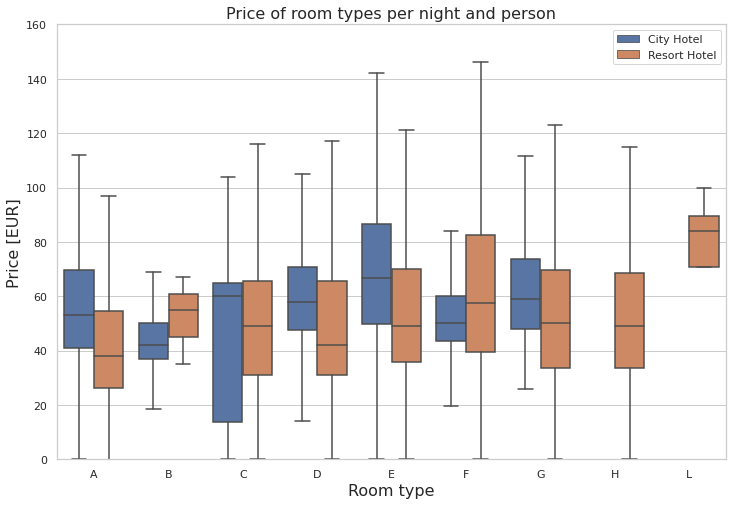

In [ ]:
# normalize price per night (adr):
full_data_cln["adr_pp"] = full_data_cln["adr"] / (full_data_cln["adults"] + full_data_cln["children"])
full_data_guests = full_data_cln.loc[full_data_cln["is_canceled"] == 0] # only actual guests
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

This figure shows the average price per room, depending on its type and the standard deviation.
Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

###🌿learned - DataFrame for Graph

그래프 그릴 때, 그래프에서 보고싶은 컬럼들을 먼저 선택해서 따로 DataFrame 변수 이름을 지정해주고 그래프를 그린다. 여러 컬럼을 한번에 선택할 때는 리스트 형태 `["컬럼1", "컬럼2"....]` 형태로 가져와야한다.
(그래프에 들어갈 컬럼만 뽑아서 `room_prices`로 지정했음) → 혼자 연습할 때 이부분을 자주 놓쳤음

In [ ]:
###room_prices

,hotel,reserved_room_type,adr_pp
119389,City Hotel,A,75.60
102432,City Hotel,A,89.55
77019,City Hotel,A,53.00
77020,City Hotel,A,53.00
77021,City Hotel,A,50.40
...,...,...,...
24110,Resort Hotel,H,34.00
354,Resort Hotel,L,37.50
15855,Resort Hotel,L,86.00
911,Resort Hotel,L,100.00


### **How does the price per night vary over the year?**

To keep it simple, I'm using the average price per night and person, regardless of the room type and meal.

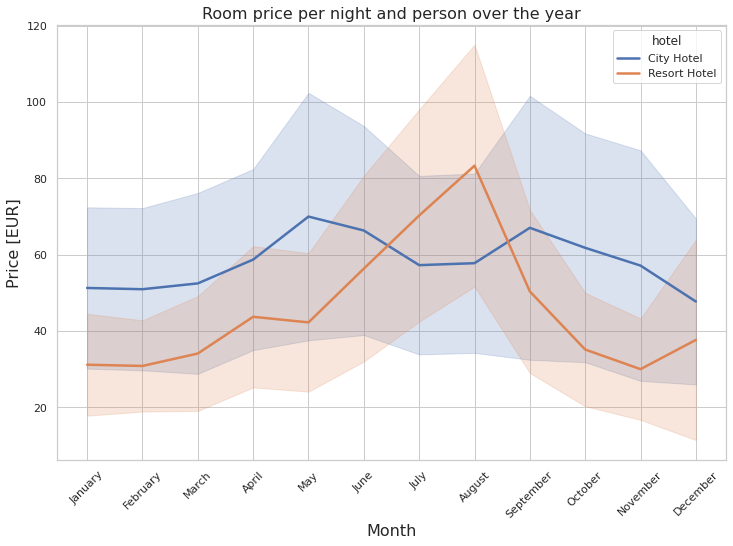

In [ ]:
# grab data:
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here)

The price of the city hotel varies less and is most expensive during spring and autumn.

###🌿learned - pandas.Categorical & seaborn.lineplot

***class pandas.Categorical(values, categories=None, ordered=None, dtype=None, fastpath=False, copy=True)***

https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html
<br><br>
***parameter - ci : int or “sd” or None***

Size of the confidence interval to draw when aggregating with an estimator. “sd” means to draw the standard deviation of the data. Setting to None will skip bootstrapping.
https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [ ]:
# room_prices_mothly
# room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)
# values를 room_prices_mothly["arrival_date_month"] 컬럼값으로 주고, 순서가 있게 하는데 카테고리 순서는 ordered_months에서 나열한 순으로 가진다.

,hotel,arrival_date_month,adr_pp
48869,City Hotel,April,81.90
110755,City Hotel,April,115.00
110756,City Hotel,April,57.50
110757,City Hotel,April,65.25
110758,City Hotel,April,65.25
...,...,...,...
43535,City Hotel,September,47.25
43534,City Hotel,September,0.00
43533,City Hotel,September,31.00
43577,City Hotel,September,45.00


### **Which are the most busy month?**

In [ ]:
###city_guests_monthly

arrival_date_month
April        4010
August       5367
December     2377
February     3051
January      2249
July         4770
June         4358
March        4049
May          4568
November     2676
October      4326
September    4283
Name: hotel, dtype: int64

In [ ]:
###city_guest_data

,month,hotel,guests
0,April,City hotel,4010
1,August,City hotel,5367
2,December,City hotel,2377
3,February,City hotel,3051
4,January,City hotel,2249
5,July,City hotel,4770
6,June,City hotel,4358
7,March,City hotel,4049
8,May,City hotel,4568
9,November,City hotel,2676


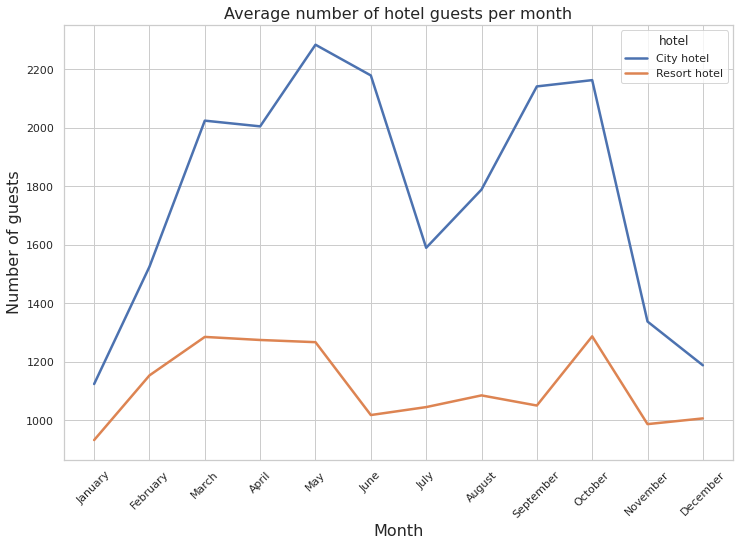

In [ ]:
# Create a DataFrame with the relevant data:
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index), 
                                   "hotel": "Resort hotel",
                                   "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index), 
                                   "hotel": "City hotel",
                                   "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data, city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

# show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data,
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

The City hotel has more guests during spring and autumn, when the prices are also hightes.
<br> In July and August theres are less visitors, although prices are lower.

Guest numbers for the Resort hotel go down slightly from June to September, which is also when the prices are hightest. <br> Both hotels have the fewest guests during winter.

### **How long do people stay at the hotels?**

In [ ]:
# Create a DataFrame with the relevant data:
rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]

num_nights_res = list(rh["total_nights"].value_counts().index)
num_bookings_res = list(rh["total_nights"].value_counts())
rel_bookings_res = rh["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(ch["total_nights"].value_counts().index)
num_bookings_cty = list(ch["total_nights"].value_counts())
rel_bookings_cty = ch["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
###nights_data

,hotel,num_nights,rel_num_bookings
0,Resort hotel,1,22.743458
1,Resort hotel,2,15.514917
2,Resort hotel,7,15.328240
3,Resort hotel,3,13.233311
4,Resort hotel,4,11.480624
...,...,...,...
57,City hotel,21,0.002170
58,City hotel,24,0.002170
59,City hotel,18,0.002170
60,City hotel,23,0.002170


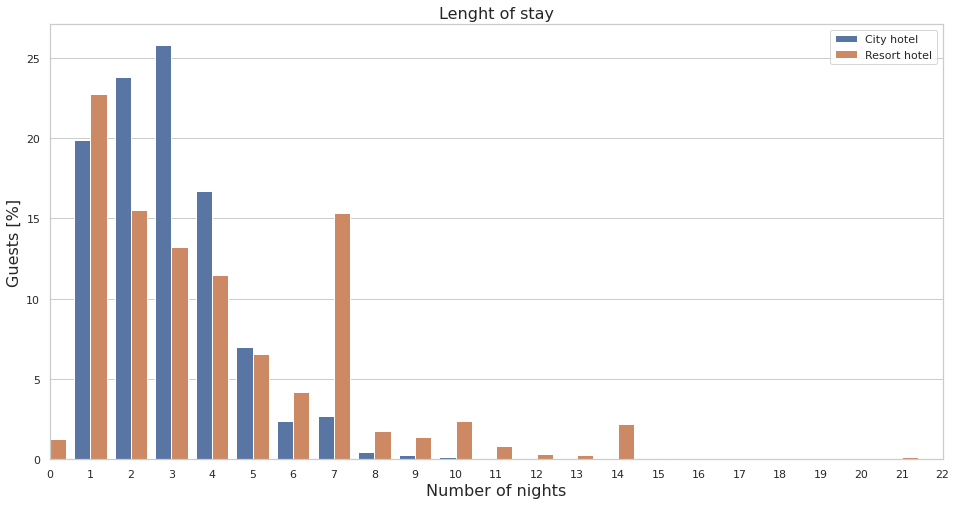

In [ ]:
# show figure:
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y="rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Lenght of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

In [ ]:
avg_nights_res = sum(list((res_nights["num_nights"] * (res_nights["rel_num_bookings"]/100)).values))
avg_nights_cty = sum(list((cty_nights["num_nights"] * (cty_nights["rel_num_bookings"]/100)).values))
print(f"On average, guests of the City hotel stay {avg_nights_cty:.2f} nights, and {cty_nights['num_nights'].max()} at maximum.")
print(f"On average, guests of the Resort hotel stay {avg_nights_res:.2f} nights, and {res_nights['num_nights'].max()} at maximum.")

On average, guests of the City hotel stay 2.92 nights, and 48 at maximum.
On average, guests of the Resort hotel stay 4.14 nights, and 69 at maximum.


### **Bookings by market segment**

In [ ]:
# total bookings per market segment (incl. canceled)
segments=full_data_cln["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

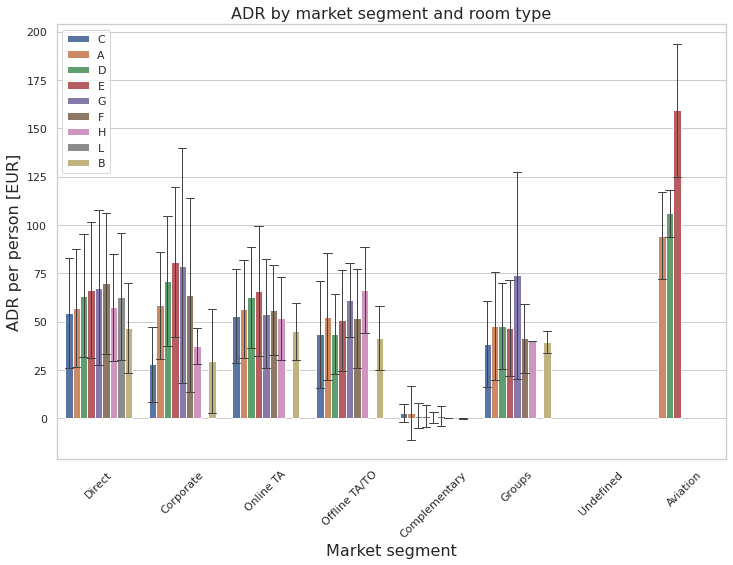

In [ ]:
# price per night (ADR) and person based on booking and room.
# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x="market_segment",
            y="adr_pp",
            hue="reserved_room_type",
            data=full_data_cln,
            ci="sd",
            errwidth=1,
            capsize=0.1)
plt.title("ADR by market segment and room type", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person [EUR]", fontsize=16)
plt.legend(loc="upper left")
plt.show()

On average, groups get the best prices and Airlines pay approximately twice as much.
<br><br>
What are possible reasons for the high prices paid by Airlines?

In [ ]:
# Summarize Relevant data:
Airline_data = full_data_cln.loc[full_data_cln["market_segment"] == "Aviation"][["is_canceled", "adults", "lead_time", "adr_pp",]].describe()

Non_Airline_data = full_data_cln.loc[full_data_cln["market_segment"] != "Aviation"][["is_canceled", "adults", "lead_time", "adr_pp",]].describe()

In [ ]:
Airline_data

,is_canceled,adults,lead_time,adr_pp
count,235.000000,235.000000,235.00000,235.000000
mean,0.221277,1.012766,4.47234,100.270979
std,0.415992,0.112503,4.61629,20.376689
min,0.000000,1.000000,0.00000,0.000000
25%,0.000000,1.000000,1.00000,95.000000
50%,0.000000,1.000000,3.00000,95.000000
75%,0.000000,1.000000,6.00000,110.000000
max,1.000000,2.000000,23.00000,193.500000


In [ ]:
Non_Airline_data

,is_canceled,adults,lead_time,adr_pp
count,118975.000000,118975.000000,118975.000000,118971.000000
mean,0.371061,1.860878,104.306031,55.038212
std,0.483091,0.574499,106.888885,29.016998
min,0.000000,0.000000,0.000000,-3.190000
25%,0.000000,2.000000,18.000000,37.440000
50%,0.000000,2.000000,69.000000,49.500000
75%,1.000000,2.000000,161.000000,66.000000
max,1.000000,55.000000,737.000000,2700.000000


- Lead time for bookings from Aviation is very short: Mean 4 days vs. 104 days for other bookings.
- Airlines NEED a place for their crews to stay.
- Airline personel usually gets one room per person - more total rooms required compared to families.

### **How many bookings were canceled?**

In [ ]:
# absoulte cancelations:
total_cancelations = full_data_cln["is_canceled"].sum()
rh_cancelations = full_data_cln.loc[full_data_cln["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = full_data_cln.loc[full_data_cln["hotel"] == "City Hotel"]["is_canceled"].sum()

# as percent:
rel_cancel = total_cancelations / full_data_cln.shape[0] * 100
rh_rel_cancel = rh_cancelations / full_data_cln.loc[full_data_cln["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = ch_cancelations / full_data_cln.loc[full_data_cln["hotel"] == "City Hotel"].shape[0] * 100

print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {rh_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {ch_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 44,199 (37 %)
Resort hotel bookings canceled: 11,120 (28 %)
City hotel bookings canceled: 33,079 (42 %)


In [ ]:
###full_data_cln.shape

(119210, 33)

### **Which month have the highest number of cancelations?**

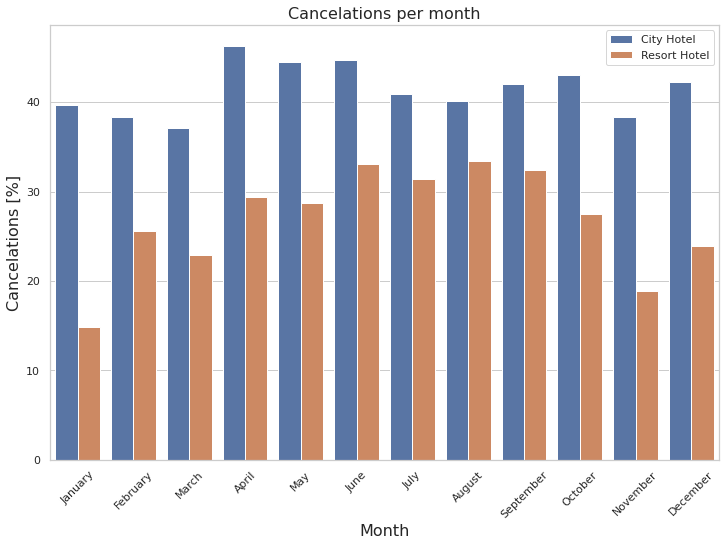

In [ ]:
# Create a DataFrame with the relevant data:
res_book_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel", 
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel", 
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent", hue="Hotel", 
            hue_order=["City Hotel", "Resort Hotel"], data = full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

For the City hotel the relative number of cancelations is around 40% throughout the year.

For the Resort hotel is highest in the summer and lowest during the winter.

###🌿learned - pandas.DataFrame.groupby
***DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)***

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html


###🌿learned - pandas.DataFrame.drop
***DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')***
<br><br>
***parameter - axis{0 or ‘index’, 1 or ‘columns’}, default 0***
<br>Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

## **2. Predict cancelations**

Which numerical features are most important?

In [ ]:
cancel_corr = full_data.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

From this list it is apparent that lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations are the 5 most important numerical features.
<br> However, to predict wheater or not a booking will be canceled, the number of booking changes is a possible source of leakage, because this information can chage over time.
<br> I will also not include days_in_waiting_list and arrival_date_year.

The most important feature to exclude is the "reservation_status":

In [ ]:
full_data.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64

### **Comparing different base models:**

In [ ]:
# manually choose columns to include
# some columns are excluded to make the model more genenral and to prevent leakage
# (arrival_date_year, assigned_room_type, booking_changes, reservation_status, country, days_in_waiting_list)
# including the country would increase accuracy, but it may also make the model less general

num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

# Separate features and predicted value
features = num_features + cat_features
X = full_data.drop(["is_canceled"], axis=1)[features]
y = full_data["is_canceled"]

# Preprocessing for numerical features:
# for most num cols, except the dates, 0 is the most logical choice as fill value
# and here no dates are missing.
num_transformer = SimpleImputer(strategy="constant")

# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

###❔Question❗Consideration
1) 왜 0으로 채웠는가?

    # Preprocessing for numerical features:
    # for most num cols, except the dates, 0 is the most logical choice as fill value

데이터프레임 X의 결측치를 확인해보니 아래 두가지 컬럼만 결측치가 있었다.

    agent                              16340
    company                           112593

따라서 수치형 데이터를 전처리할 때, agent와 company를 0으로 채워주어도 문제가 되지 않을것으로 확인했고 왜 필자가 위와 같이 언급했는지 알 수 있었다.


In [ ]:
###X.isnull().sum()

lead_time                              0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
agent                              16340
company                           112593
required_car_parking_spaces            0
total_of_special_requests              0
adr                                    0
hotel                                  0
arrival_date_month                     0
meal                                   0
market_segment                         0
distribution_channel                   0
reserved_room_type                     0
deposit_type                           0
customer_type                          0
dtype: int64

###🌿learned - sklearn.impute.SimpleImputer

Imputation transformer for completing missing values.

***class sklearn.impute.SimpleImputer ( *, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False***
<br><br>
**strategy : *str, default=’mean’***

The imputation strategy.

- If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.
- If “median”, then replace missing values using the median along each column. Can only be used with numeric data.
- If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.
- If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

*New in version 0.20: strategy=”constant” for fixed value imputation.*
<br><br>
**fill_value : *str or numerical value, default=None***

When strategy == “constant”, fill_value is used to replace all occurrences of missing_values. If left to the default, fill_value will be 0 when imputing numerical data and “missing_value” for strings or object data types.

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

    num_transformer = SimpleImputer(strategy="constant")


###🌿learned - sklearn.pipeline.Pipeline

Pipeline of transforms with a final estimator.

***class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)***
<br><br>
*Parameter*  
**steps : *list of tuple***  
List of (name, transform) tuples (implementing fit/transform) that are chained, in the order in which they are chained, with the last object an estimator.
<br><br>
The Pipeline is built using a list of (key, value) pairs, where the key is a string containing the name you want to give this step and value is an estimator object:
<br><br>
*Attributes*  
**named_steps : *Bunch***   - Access the steps by name.

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

    # Preprocessing for categorical features:
    cat_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))])

###🌿learned - sklearn.preprocessing.OneHotEncoder

Encode categorical features as a one-hot numeric array.

***class sklearn.preprocessing.OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None)**
<br><br>
**handle_unknown : *{‘error’, ‘ignore’, ‘infrequent_if_exist’}, default=’error’***

Specifies the way unknown categories are handled during transform.

- ‘error’ : Raise an error if an unknown category is present during transform.
- ‘ignore’ : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.
- ‘infrequent_if_exist’ : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then transform and inverse_transform will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

###🌿learned - sklearn.compose.ColumnTransformer

Applies transformers to columns of an array or pandas DataFrame.

***class sklearn.compose.ColumnTransformer(transformers, *, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False, verbose_feature_names_out=True***
<br><br>
**transformers : *list of tuples***

List of (name, transformer, columns) tuples specifying the transformer objects to be applied to subsets of the data.

https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

    # Bundle preprocessing for numerical and categorical features:
    preprocessor = ColumnTransformer(transformers=[("num" num_transformer, num_features),
                                                   ("cat", cat_transformer, cat_features)])

In [ ]:
# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42, n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42, n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
kfolds = 4  # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    # pack preprocessing of data and the model in a pipeline:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor), 
                                  ('model', model)])
    
    # get cross validation score for each model:
    cv_results = cross_val_score(model_steps, 
                                 X, y,
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    # output:
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f" {name} cross validation accuracy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

    #pipeline.fit(X_train, y_train)
    #preds = pipeline.predict(X_valid)
    #score = accuracy_score(y_valid, preds)
    #print(f" {name} accuracy_score: {round(score, 4)}")

 DT_model cross validation accuracy score: 0.8246 +/- 0.0016 (std) min: 0.8221, max: 0.8263
 RF_model cross validation accuracy score: 0.8664 +/- 0.0012 (std) min: 0.8646, max: 0.8676
 LR_model cross validation accuracy score: 0.7937 +/- 0.0012 (std) min: 0.792, max: 0.7952
 XGB_model cross validation accuracy score: 0.8165 +/- 0.0016 (std) min: 0.8139, max: 0.8181


The RandomForest model performs best.
I also did some hyperparameter optimization, but the accuracy increase is minimal:

###🌿learned - sklearn.model_selection.KFold

K-Folds cross-validator

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).

Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
<br><br>
***class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)***
<br><br>
**n_splits : *int, default=5***

Number of folds. Must be at least 2.

**shuffle : *bool, default=False***

Whether to shuffle the data before splitting into batches. Note that the samples within each split will not be shuffled.

**random_state : *int, RandomState instance or None, default=None***

When shuffle is True, random_state affects the ordering of the indices, which controls the randomness of each fold. Otherwise, this parameter has no effect. Pass an int for reproducible output across multiple function calls. See Glossary.


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

    # split data into 'kfolds' parts for cross validation,
    # use shuffle to ensure random distribution of data:
    kfolds = 4  # 4 = 75% train, 25% validation
    split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

###🌿learned - sklearn.model_selection.cross_val_score

Evaluate a score by cross-validation.
<br><br>
***sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)***
<br><br>
**estimator : *estimator object implementing ‘fit’***  
The object to use to fit the data.

**X : *array-like of shape (n_samples, n_features)***   
The data to fit. Can be for example a list, or an array.

**y : *array-like of shape (n_samples,) or (n_samples, n_outputs), default=None***  
The target variable to try to predict in the case of supervised learning.

**scoring : *str or callable, default=None***  
A str (see model evaluation documentation) or a scorer callable object / function with signature `scorer(estimator, X, y)` which should return only a single value.

Similar to cross_validate but only a single metric is permitted.

If `None`, the estimator’s default scorer (if available) is used.

**cv : *int, cross-validation generator or an iterable, default=None***  
Determines the cross-validation splitting strategy. Possible inputs for cv are:
- None, to use the default 5-fold cross validation,
- int, to specify the number of folds in a (Stratified)KFold,
- CV splitter,
- An iterable that generates (train, test) splits as arrays of indices.

For `int`/`None` inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used. These splitters are instantiated with `shuffle=False` so the splits will be the same across calls.

**n_jobs : *int, default=None***  
Number of jobs to run in parallel. Training the estimator and computing the score are parallelized over the cross-validation splits. `None` means 1 unless in a joblib.parallel_backend context. `-1` means using all processors. 


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

    # get cross validation score for each model:
    cv_results = cross_val_score(model_steps, 
                                 X, y,
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)

In [ ]:
# Enhanced RF model with the best parameters I found:
rf_model_enh = RandomForestClassifier(n_estimators=160,
                                      max_features=0.4,
                                      min_samples_split=2,
                                      n_jobs=-1,
                                      random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe,
                             X, y,
                             cv=split,
                             scoring="accuracy",
                             n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Enhanced RF model cross validation accuracy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Enhanced RF model cross validation accuracy score: 0.8681 +/- 0.0006 (std) min: 0.8673, max: 0.869


###🌿learned - sklearn.ensemble.RandomForestClassifier

A random forest classifier

**class sklearn.ensemble.RandomForestClassifier** *(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)*
<br><br>
**n_estimators : *int, default=100***  
The number of trees in the forest.

**max_features : *{“sqrt”, “log2”, None}, int or float, default=”sqrt”***  
The number of features to consider when looking for the best split:
- If int, then consider `max_features` features at each split.
- If float, then `max_features` is a fraction and `round(max_features * n_features)` features are considered at each split.
- If “auto”, then `max_features=sqrt(n_features)`.
- If “sqrt”, then `max_features=sqrt(n_features)`.
- If “log2”, then `max_features=log2(n_features)`.
- If None, then `max_features=n_features`.

**min_samples_split : *int or float, default=2***  
The minimum number of samples required to split an internal node:
- If int, then consider `min_samples_split` as the minimum number.
- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split.

**n_jobs : *int, default=None***  
The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. `None` means 1 unless in a joblib.parallel_backend context. `-1` means using all processors.

**random_state : *int, RandomState instance or None, default=None***  
Controls both the randomness of the bootstrapping of the samples used when building trees (if `bootstrap=True`) and the sampling of the features to consider when looking for the best split at each node (if `max_features < n_features`).

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

    rf_model_enh = RandomForestClassifier(n_estimators=160,
                                        max_features=0.4,
                                        min_samples_split=2,
                                        n_jobs=-1,
                                        random_state=0)


## **3. Evaluate Feature importance**

In [ ]:
# fit model(pipeline) so value can be accessed:
model_pipe.fit(X, y)

# Names of all (encoded) features are needed.
# Get names of columns from One Hot Encoding:
onehot_columns = list(model_pipe.named_steps['preprocessor'].
                      named_transformers_['cat'].
                      named_steps['onehot'].
                      get_feature_names(input_features=cat_features))

# Add num_features for full list.
# Order must be as in definition of X, where num_features are first:
feat_imp_list = num_features + onehot_columns

# show 10 most important features, provide names of features:
feat_imp_df = eli5.formatters.as_dataframe.explain_weights_df(
    model_pipe.named_steps['model'],
    feature_names=feat_imp_list)
feat_imp_df.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,feature,weight,std
0,lead_time,0.145140,0.015235
1,deposit_type_Non Refund,0.140641,0.108007
2,adr,0.096222,0.003412
3,deposit_type_No Deposit,0.079059,0.106235
4,arrival_date_day_of_month,0.069410,0.002033
5,arrival_date_week_number,0.053763,0.001999
6,total_of_special_requests,0.050567,0.013314
7,agent,0.043060,0.006392
8,stays_in_week_nights,0.041588,0.002291
9,previous_cancellations,0.038626,0.013459


###❓Question

    onehot_columns = list(model_pipe.named_steps['preprocessor'].
                        named_transformers_['cat'].
                        named_steps['onehot'].
                        get_feature_names(input_features=cat_features))

### **Looking at the three most important features:**
- lead_time
- deposit_type
- adr

### **lead_time**

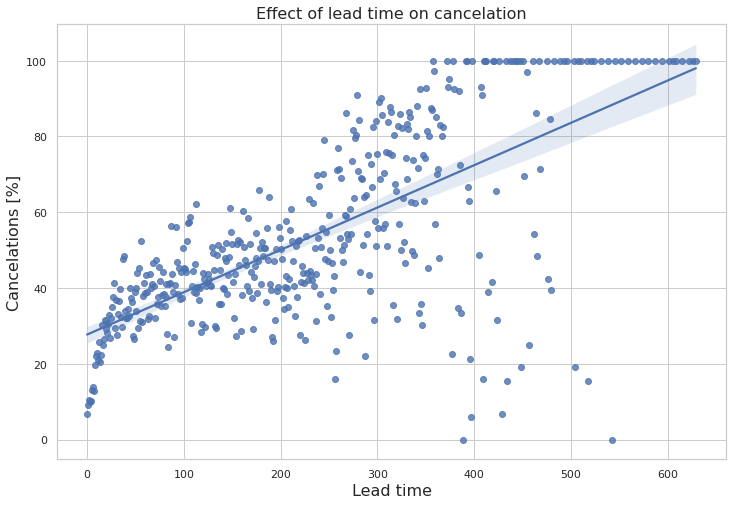

In [ ]:
# group data for lead_time:
lead_cancel_data = full_data_cln.groupby("lead_time")["is_canceled"].describe()
# use only lead_times with more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

# show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0, 365)
plt.show()

Bookings made a few days before the arrival date are rarely canceled, whereas bookings made over one year in advance are canceled very often.

###🌿learned - seaborn.regplot

Plot data and a linear regression model fit.

***seaborn.regplot( *, x=None, y=None, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)***

https://seaborn.pydata.org/generated/seaborn.regplot.html

In [ ]:
###lead_cancel_data_10

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,6264.0,0.066571,0.249297,0.0,0.0,0.0,0.0,1.0
1,3445.0,0.092308,0.289502,0.0,0.0,0.0,0.0,1.0
2,2065.0,0.103148,0.304225,0.0,0.0,0.0,0.0,1.0
3,1815.0,0.100275,0.300450,0.0,0.0,0.0,0.0,1.0
4,1710.0,0.102339,0.303182,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
608,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
615,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
622,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


### **Deposit type:**

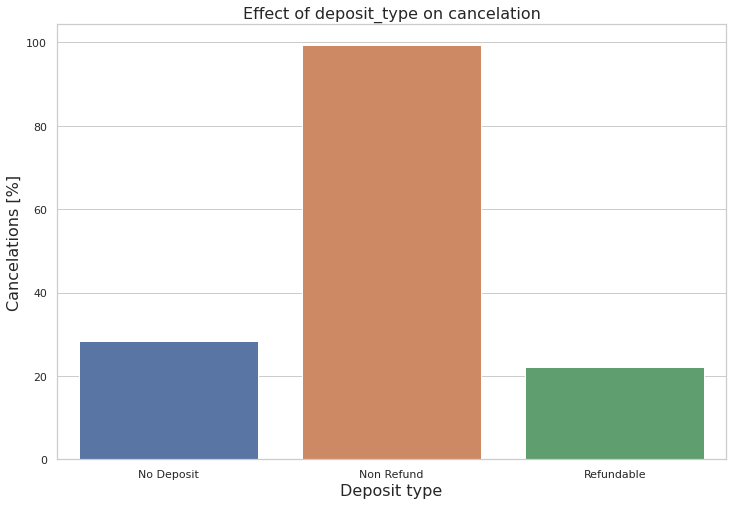

In [ ]:
# group data for deposit type:
deposit_cancel_data = full_data_cln.groupby("deposit_type")["is_canceled"].describe()

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data["mean"] * 100)
plt.title("Effect of deposit_type on cancelation", fontsize=16)
plt.xlabel("Deposit type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

As Susmit Vengurlekar already pointed out in the Discussion section of the dataset, the doposit_type "Non Refund" and the "is_canceled" column are correlated in a counter-intuitive way. <br>
Over 99% of people who paid the entire amount upfront canceled. This raises the question if there is something wrong with the data (or the description).<br>
What else stands out for Non Refund doposits?
Here is a table of all mean values of the data, grouped by deposit type:



In [ ]:
deposit_mean_data = full_data_cln.groupby("deposit_type").mean()
deposit_mean_data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_pp
deposit_type,,,,,,,,,,,,,,,,,,,,,
No Deposit,0.284020,88.841951,2016.173950,27.133208,15.815223,0.969615,2.555633,1.865806,0.118604,0.009085,0.035295,0.042044,0.154938,0.247030,78.745503,11.175874,1.518040,103.685436,0.071184,0.651726,55.233383
Non Refund,0.993624,212.908891,2016.031466,27.448619,15.595462,0.621718,2.091109,1.811407,0.000617,0.000000,0.004387,0.411462,0.010626,0.012477,47.480016,6.215809,7.992253,89.964017,0.000069,0.001782,54.520286
Refundable,0.222222,152.098765,2016.141975,20.932099,23.456790,0.975309,2.851852,1.907407,0.030864,0.000000,0.024691,0.000000,0.018519,0.592593,56.185185,133.666667,9.586420,76.209753,0.123457,0.141975,41.444239


Comparing the mean values for Non Refund to No Deposit shows the following:
<br><br>
- Non Refund deposits are characterized by > 2x longer lead_time
- is_repeated_guest is ~ 1/10th
- previous_cancellations is 10x higher
- previous_bookings_not_canceled is 1/15th
- required_car_parking_spaces is almost zero
- special requests are very rare<br><br>


Based on these findings it seems that especially people who have not previously visited one of the hotels book, pay and cancel repeatedly... this is strange!
<br><br>
To adress this issue, I will make a model without this feature below.

### **ADR**

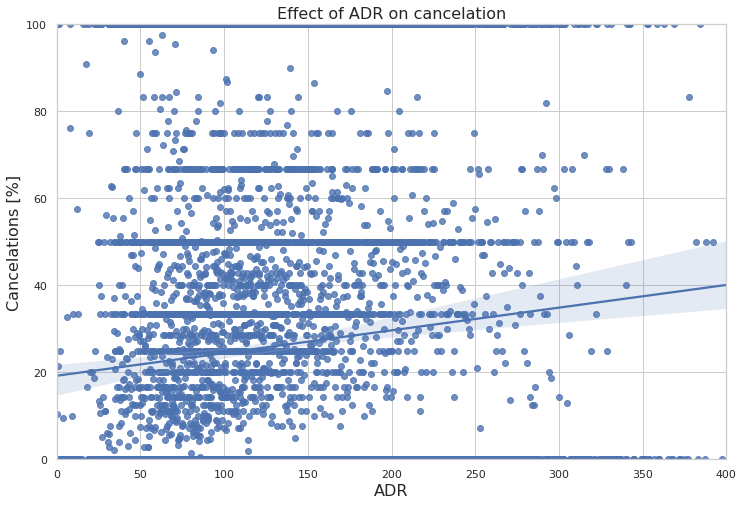

In [ ]:
# group data for adr:
adr_cancel_data = full_data_cln.groupby("adr")["is_canceled"].describe()
# show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=adr_cancel_data.index, y=adr_cancel_data["mean"].values * 100)
plt.title("Effect of ADR on cancelation", fontsize=16)
plt.xlabel("ADR", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.xlim(0,400)
plt.ylim(0,100)
plt.show()

### **RF model without deposit type:**

In [ ]:
cat_features_non_dep = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","customer_type"]

features_non_dep = num_features + cat_features_non_dep
X_non_dep = full_data.drop(["is_canceled"], axis=1)[features_non_dep]


# Bundle preprocessing for numerical and categorical features:
preprocessor_non_dep = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features_non_dep)])

# Define dataset:
X_non_dep = full_data.drop(["is_canceled"], axis=1)[features_non_dep]
# Define model
rf_model_non_dep = RandomForestClassifier(random_state=42) # basic model for this purpose

kfolds=4
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor_non_dep),
                              ('model', rf_model_non_dep)])
cv_results = cross_val_score(model_pipe, 
                                 X_non_dep, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"RF model without deposit_type feature cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

RF model without deposit_type feature cross validation accuarcy score: 0.8653 +/- 0.0013 (std) min: 0.8631, max: 0.8663


In [ ]:
###X_non_dep

In [ ]:
# feat importance of original model:
feat_imp_df.head(10)

,feature,weight,std
0,lead_time,0.145140,0.015235
1,deposit_type_Non Refund,0.140641,0.108007
2,adr,0.096222,0.003412
3,deposit_type_No Deposit,0.079059,0.106235
4,arrival_date_day_of_month,0.069410,0.002033
5,arrival_date_week_number,0.053763,0.001999
6,total_of_special_requests,0.050567,0.013314
7,agent,0.043060,0.006392
8,stays_in_week_nights,0.041588,0.002291
9,previous_cancellations,0.038626,0.013459


In [ ]:
# Check feature importance of new model:
# fit model(pipeline) so values can be accessed:
model_pipe.fit(X_non_dep, y)

# Names of all (encoded) features are needed.
# Get names of columns from One Hot Encoding:
onehot_columns = list(model_pipe.named_steps['preprocessor'].
                      named_transformers_['cat'].
                      named_steps['onehot'].
                      get_feature_names(input_features=cat_features_non_dep))

# Add num_features for full list.
# Order must be as in definition of X, where num_features are first:
feat_imp_list = num_features + onehot_columns

# show 10 most important features, provide names of features:
feat_imp_df_non_dep = eli5.formatters.as_dataframe.explain_weights_df(
    model_pipe.named_steps['model'],
    feature_names=feat_imp_list)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
# feat importance of new model:
feat_imp_df_non_dep.head(10)

,feature,weight,std
0,lead_time,0.175189,0.019580
1,adr,0.111566,0.008185
2,total_of_special_requests,0.078749,0.013435
3,arrival_date_day_of_month,0.076958,0.003056
4,arrival_date_week_number,0.060699,0.004069
5,agent,0.054862,0.009409
6,stays_in_week_nights,0.049275,0.004647
7,previous_cancellations,0.047592,0.016409
8,stays_in_weekend_nights,0.031298,0.002617
9,customer_type_Transient,0.028016,0.018087


The new accuracy score of 0.8653 is almost identical to the one obtained with the deposit_type included (0.8664), which placed significant wheight on this feature.

The new model compensated this by placing increased weight on lead_time, adr, total_of_special_requests and others.

### Comments, questions, suggestions? Let me know!

### If you like the notebook or learned something please upvote! :)